<a href="https://colab.research.google.com/github/tb-harris/neuroscience-2025/blob/main/2_Patch_seq_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Patch-seq Data

## Setup

Loading our Google Drive files:

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Metadata

Let's load in the metadata file, which has information about each neuron that was analyzed in Gouwens et al, 2020.

We can use `index_col` to set the cell_specimen_id column to be the index of the dataframe

In [4]:
cell_metadata = pd.read_csv("/content/drive/Shareddrives/Lisman Laboratory/Lisman 2025/Neuroscience 2025/Data/20200711_patchseq_metadata_mouse.csv", index_col="cell_specimen_id")

In [5]:
cell_metadata.head()

,project,cell_specimen_name,hemisphere,structure,donor_id,donor_name,biological_sex,age,ethnicity,medical_conditions,...,apical_dendrite_status,neuron_reconstruction_type,cell_soma_normalized_depth,depth_from_pia_um,ephys_session_id,transcriptomics_sample_id,transcriptomics_batch,T-type Accession ID,T-type Label,MET-type Label
cell_specimen_id,,,,,,,,,,,,,,,,,,,,,
601506507,mIVSCC-MET,Vip-IRES-Cre;Ai14-331294.04.01.01,left,VISpm4,331294,Vip-IRES-Cre;Ai14-331294,M,P55,NaN,NaN,...,NaN,full,0.361015,NaN,601506492,PS0810_E1-50_S88,BT035,CS180626100018,Vip Gpc3 Slc18a3,Vip-MET-2
601790961,mIVSCC-MET,Sst-IRES-Cre;Ai14-331663.04.01.01,left,VISpm5,331663,Sst-IRES-Cre;Ai14-331663,F,P57,NaN,NaN,...,NaN,full,0.621829,NaN,601790945,PS0817_E1-50_S19,BT036,CS180626100041,Sst Tac2 Myh4,NaN
601803754,mIVSCC-MET,Sst-IRES-Cre;Ai14-331663.04.02.02,right,VISp2/3,331663,Sst-IRES-Cre;Ai14-331663,F,P57,NaN,NaN,...,NaN,full,0.164240,NaN,601803733,PS0817_E1-50_S25,BT036,CS180626100035,Sst Calb2 Pdlim5,Sst-MET-3
601808698,mIVSCC-MET,Sst-IRES-Cre;Ai14-331663.04.02.03,right,VISp5,331663,Sst-IRES-Cre;Ai14-331663,F,P57,NaN,NaN,...,NaN,full,0.483030,NaN,601808619,PS0817_E1-50_S26,BT036,CS180626100043,Sst Hpse Cbln4,Sst-MET-8
601810307,mIVSCC-MET,Sst-IRES-Cre;Ai14-331663.04.02.04,right,VISp2/3,331663,Sst-IRES-Cre;Ai14-331663,F,P57,NaN,NaN,...,NaN,full,0.295656,NaN,601810292,PS0817_E1-50_S27,BT036,CS180626100034,Sst Calb2 Necab1,Sst-MET-3


### Examining a cell

Let's look at one cell to see what information the dataset contains about each cell:

In [6]:
cell_metadata.loc[601810307]

,601810307
project,mIVSCC-MET
cell_specimen_name,Sst-IRES-Cre;Ai14-331663.04.02.04
hemisphere,right
structure,VISp2/3
donor_id,331663
donor_name,Sst-IRES-Cre;Ai14-331663
biological_sex,F
age,P57
ethnicity,NaN
medical_conditions,NaN


This is a unified format for both mice and humans, but our cells are all mice: certain features (ethnicity, medical conditions) therefore aren't recorded

### How many cells are there total?

In [7]:
cell_metadata.shape

(4435, 22)

There are 4,435 cells.

### How many total mice are represented in the dataset?

In [8]:
cell_metadata['donor_id'].nunique()

1040

There 1,040 unique donor mice in the dataset -- only an average of 4 cells per mouse

Text(0.5, 0, 'Number of cells donated')

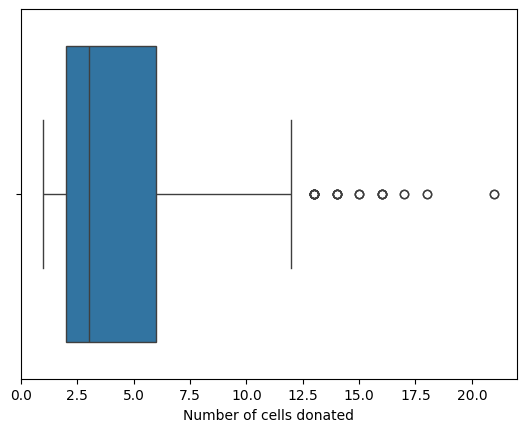

In [13]:
sns.boxplot(x=cell_metadata['donor_id'].value_counts())
plt.xlabel('Number of cells donated')

### Which brain structures are represented in the dataset?

In [ ]:
cell_metadata['structure'].value_counts()

There are a lot of different structures- seems like this field indicates a lot of info:
* VIS - visual cortex
* p/a/m - posterior/anterior/medial
* Number - layer?

## Categorical splits

In [17]:
cell_metadata['hemisphere'].value_counts()

,count
hemisphere,
right,2352
left,2083


In [18]:
cell_metadata['biological_sex'].value_counts()

,count
biological_sex,
M,2417
F,2018


Roughly even split between hemispheres, biological sexes

## Genetic Data

Our transcriptomic data is saved in an hdf file because it is so large (4,000 cells $\times$ 40,000 genes $\approx$ 160 million counts!)

In [19]:
rna_data = pd.read_hdf("/content/drive/Shareddrives/Lisman Laboratory/Lisman 2025/Neuroscience 2025/Data/gene_counts_ppm.hdf5.lz4")

Each column represents a gene- some are unidentified, but most have meaningful names that reflect their function
 * Should we ignore some of these?

In [20]:
rna_data.columns

Index(['0610005C13Rik', '0610006L08Rik', '0610007P14Rik', '0610009B22Rik',
       '0610009E02Rik', '0610009L18Rik', '0610009O20Rik', '0610010B08Rik',
       '0610010F05Rik', '0610010K14Rik',
       ...
       'n-R5s134', 'n-R5s136', 'n-R5s138', 'n-R5s139', 'n-R5s141', 'n-R5s142',
       'n-R5s143', 'n-R5s144', 'n-R5s146', 'n-R5s149'],
      dtype='object', name='sample_id', length=45768)

A random sampling of gene names:

In [23]:
import numpy as np
np.random.choice(rna_data.columns, 20)

array(['Hexim1', 'Rpl9-ps5', 'Plin5', '2310015K22Rik', 'Grin3b',
       '4930522P08Rik', 'Cbr3', 'Rdh8', 'Cd2', '1700016P04Rik',
       'LOC105247182', 'Gm31595', 'Gm32780', 'Gm20570', 'Zfp941',
       'Gm4265', 'Gm5547', 'Tnfrsf12a', 'Gm33527', 'Cdk1'], dtype=object)

Each row represents a cell, with the columns representing the relative amount of gene expression in ppm

For example, if we just have genes A, B, and C, and there are 10 copies of A, 90 copies of B, 0 copies of C in the cell, that would result in:

* A - 100,000
* B - 900,000
* C - 0

5% of RNA is Gene X --> Gene X is 50,000 cpm

Normalized per cell -- we're looking at the

## Looking at a cell

Let's look at the top 10 genes expressed in a cell:

In [26]:
# sort the values in the cell in descending order
rna_data.loc[992825872].sort_values(ascending = False).head(10)

,992825872
sample_id,
Malat1,8896.351940
Rn18s-rs5,8712.864681
Nrxn3,8099.387078
Adarb2,6696.358241
Lars2,6483.216476
Calm1,5706.639088
Arpp21,4700.239275
Zc3h7a,4207.233105
Snap25,4025.599253


Malat1 has 8896 cpm expression $\rightarrow$ accounts for 0.89% of cell's measured transcriptome